## DATA PREPARATION

In this project, I collected data from glassdoor company reviews to gain insights about employee emotions and company characteristics. Our analysis will focus on only 15 different companies. However, the analysis process and techniques can be applied to any company's glassdoor inspection data.

First, let's examine our data in detail. 

In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\companyReview")
df

,company,summary,rating,pros,cons
0,IBM,Great Company,5.0,Great company. Fantastic trading program.,No complaints. Great company work and people
1,IBM,review,5.0,good pay and will learn a lot,long hours/work after hours at times.
2,IBM,"Advisory Engineer in STG, IBM",4.0,Disclaimer: A lot of what I'm writing below of...,"1. Unfortunately, IBM still uses the ""normal d..."
3,IBM,I've seen it all ...,4.0,"A culture of generally thoughtful, ethical, op...",You have to have patience and perseverance to ...
4,IBM,Poor management drags employees down,2.0,Plenty of training and access to a Udemy busin...,Management constantly belittling employees cau...
...,...,...,...,...,...
22815,Dell Technologies,Great company,4.0,"Flexible work schedules, good pay, lots of int...",Benefits package is lagging competition
22816,Dell Technologies,Dell is all about who you know,2.0,"Team members are fun, work from home life bala...",Dell is all about who you know as far as movin...
22817,Dell Technologies,Great Place To start career,4.0,"fun, young, good pay, great training","pay transparency, high quotas, rigorous forcas..."
22818,Dell Technologies,Great company to work for but not much work li...,4.0,great Benefits and Great people,not much of work life balance


In [3]:
df.nunique()

company       15
summary    14014
rating         5
pros       22730
cons       22536
dtype: int64

There is a total of 22820 rows of data from 15 different companies.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22820 entries, 0 to 22819
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   company  22820 non-null  object 
 1   summary  22669 non-null  object 
 2   rating   22820 non-null  float64
 3   pros     22820 non-null  object 
 4   cons     22820 non-null  object 
dtypes: float64(1), object(4)
memory usage: 891.5+ KB


<AxesSubplot: xlabel='rating', ylabel='count'>

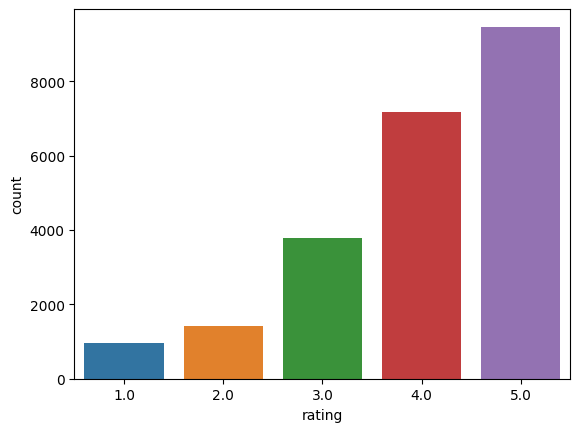

In [5]:
sns.countplot(x='rating',data=df)

In [6]:
df.rating.value_counts(normalize=True)

5.0    0.414855
4.0    0.314373
3.0    0.166389
2.0    0.061876
1.0    0.042507
Name: rating, dtype: float64

We see more positive comments

Let's start editing the data. I did a feature engineering by reducing the summary, pros and cons columns from the data to a single column.

In order to reduce the comments to a single column, I combined the pros and summary from the positive comment lines with a score above 3, and summed the cons and summary from the negative lines,  those with a score less than 3. And we named this column reviews

In [7]:
review=[]
for i in range(0,len(df.rating)):
    if  df.rating[i] <= 3:
        review.append(df.cons[i]+", "+str(df.summary[i]))
    else:
        review.append(df.pros[i]+", "+str(df.summary[i]))

In [8]:
df['reviews']=review
df.drop('summary', inplace=True, axis=1)
df.drop('pros', inplace=True, axis=1)
df.drop('cons', inplace=True, axis=1)


In [9]:
df

,company,rating,reviews
0,IBM,5.0,"Great company. Fantastic trading program., Gre..."
1,IBM,5.0,"good pay and will learn a lot, review"
2,IBM,4.0,Disclaimer: A lot of what I'm writing below of...
3,IBM,4.0,"A culture of generally thoughtful, ethical, op..."
4,IBM,2.0,Management constantly belittling employees cau...
...,...,...,...
22815,Dell Technologies,4.0,"Flexible work schedules, good pay, lots of int..."
22816,Dell Technologies,2.0,Dell is all about who you know as far as movin...
22817,Dell Technologies,4.0,"fun, young, good pay, great training, Great Pl..."
22818,Dell Technologies,4.0,"great Benefits and Great people, Great company..."


Also, creating a sentiment column, I said positives 1 and negatives 0. And we will analyze with these 2 columns we have.

In [10]:
df['sentiment'] = df['rating'].apply(lambda x: (x>=4 and 1) or 0)
df.drop('rating', inplace=True, axis=1)

In [11]:
df

,company,reviews,sentiment
0,IBM,"Great company. Fantastic trading program., Gre...",1
1,IBM,"good pay and will learn a lot, review",1
2,IBM,Disclaimer: A lot of what I'm writing below of...,1
3,IBM,"A culture of generally thoughtful, ethical, op...",1
4,IBM,Management constantly belittling employees cau...,0
...,...,...,...
22815,Dell Technologies,"Flexible work schedules, good pay, lots of int...",1
22816,Dell Technologies,Dell is all about who you know as far as movin...,0
22817,Dell Technologies,"fun, young, good pay, great training, Great Pl...",1
22818,Dell Technologies,"great Benefits and Great people, Great company...",1


In [12]:
# Removing numeric words in reviews
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# Remove punctuation and convert all words to lowercase
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()) 

df['reviews'] = df.reviews.map(alphanumeric).map(punc_lower)
df

,company,reviews,sentiment
0,IBM,great company fantastic trading program gre...,1
1,IBM,good pay and will learn a lot review,1
2,IBM,disclaimer a lot of what i m writing below of...,1
3,IBM,a culture of generally thoughtful ethical op...,1
4,IBM,management constantly belittling employees cau...,0
...,...,...,...
22815,Dell Technologies,flexible work schedules good pay lots of int...,1
22816,Dell Technologies,dell is all about who you know as far as movin...,0
22817,Dell Technologies,fun young good pay great training great pl...,1
22818,Dell Technologies,great benefits and great people great company...,1


In [13]:
#remove stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kezer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df

,company,reviews,sentiment
0,IBM,great company fantastic trading program great ...,1
1,IBM,good pay learn lot review,1
2,IBM,disclaimer lot writing course depends work are...,1
3,IBM,culture generally thoughtful ethical open driv...,1
4,IBM,management constantly belittling employees cau...,0
...,...,...,...
22815,Dell Technologies,flexible work schedules good pay lots internal...,1
22816,Dell Technologies,dell know far moving education merit qualified...,0
22817,Dell Technologies,fun young good pay great training great place ...,1
22818,Dell Technologies,great benefits great people great company work...,1


In [15]:
from nltk import SnowballStemmer

sbs = SnowballStemmer(language='english')   

In [16]:
#Getting to word roots
def stemmer(text):
    text = [sbs.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

df.reviews = df.reviews.apply(stemmer)

In [17]:
from textblob import TextBlob

In [18]:
#Catches and fixes bugs

def correct(text):
    text = [str(TextBlob(word).correct()) for word in text.split(' ')]
    text = " ".join(text)
    return text

df.reviews = df.reviews.apply(correct)

we will use this corrected data for machine learning

In [19]:
df

,company,reviews,sentiment
0,IBM,great company fantasy trade program great company,1
1,IBM,good pay learn lot review,1
2,IBM,disclaim lot write course depend work area man...,1
3,IBM,culture general thought ethics open driven col...,1
4,IBM,manage constant belittl employe cause damage m...,0
...,...,...,...
22815,Dell Technologies,flexible work schedule good pay lot inter adva...,1
22816,Dell Technologies,well know far move duc merit qualify post stil...,0
22817,Dell Technologies,fun young good pay great train great place sta...,1
22818,Dell Technologies,great benefit great people great company work ...,1


In [20]:
df.to_csv(r"C:\Users\companySetting",index=False)